# Imports

In [47]:
# pdf scanner
import PyPDF2
from pypdf import PdfReader
import pdfminer
# arrays
import pandas as pd
import numpy as np
# os
import os
# NLP
    # regex
import re
    # unicode
import unidecode
import wrangle as w

import statistics
# viz
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

import model as m

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# keras
from keras.models import Sequential
from keras.layers import Dense

## ✅ Pulling Images (only required once)

In [48]:
# pulling images from pdf 

# w.pull_images(pdf='data.pdf')

# pulling images from every individual pdf

# names = ['zhangdaqian', 'warhol', 'banksy', 'dali', 'marcchagall', 
#          'picasso', 'rembrandt', 'kaws', 'leonardtsuguharufoujita', 
#          'yayoi-kusama']

# for name in names:
#     w.pull_images(name + '.pdf', name)

# Retrieving data from all pdfs

## Not using isolated pdf version of retrieval

### Proceeding with compiled PDF, code remains for documentation purposes

In [49]:
bodies = w.pull_text(pdf='data.pdf')

Number of pages: 219
Page 1:
data.pdf
Successfully pulled text from page.

Page 2:
data.pdf
Successfully pulled text from page.

Page 3:
data.pdf
Successfully pulled text from page.

Page 4:
data.pdf
Successfully pulled text from page.

Page 5:
data.pdf
Successfully pulled text from page.

Page 6:
data.pdf
Successfully pulled text from page.

Page 7:
data.pdf
Successfully pulled text from page.

Page 8:
data.pdf
Successfully pulled text from page.

Page 9:
data.pdf
Successfully pulled text from page.

Page 10:
data.pdf
Successfully pulled text from page.

Page 11:
data.pdf
Successfully pulled text from page.

Page 12:
data.pdf
Successfully pulled text from page.

Page 13:
data.pdf
Successfully pulled text from page.

Page 14:
data.pdf
Successfully pulled text from page.

Page 15:
data.pdf
Successfully pulled text from page.

Page 16:
data.pdf
Successfully pulled text from page.

Page 17:
data.pdf
Successfully pulled text from page.

Page 18:
data.pdf
Successfully pulled text from page.

In [50]:
clean_body = w.clean_bodies(bodies)

In [51]:
# separating each entry by artist name
names = ['Zhang Daqian', 'Andy Warhol', 'Banksy', 'Salvador Dali','Marc Chagall',\
         'Pablo Picasso','Rembrandt van Rijn','KAWS','Leonard Tsuguharu Foujita',\
         'Yayoi Kusama']
# container for all entries
new_body = []
# container for each artist that has multiple names in the entry
banksy_clean = []
marc_clean = []
pablo_clean = []
rembrandt_clean = []
dali_clean = []
kaws_clean = []
for body in clean_body :
    for name in names:

        # isolating the entries that contain multiple counts of name in entry
            # the text in the if statement is the combined text where the name is repeated
            # these varie between title of piece or within the lot description

        # KAWS
        if name == 'KAWS':
            if 'Banksy and 21st Century Editions' in body:
                kaws_clean.append(body)
        else:
            pass
                
        # Banksy 
        if name == 'Banksy':
            if 'Only Banksy' in body:
                banksy_clean.append(body)
            elif 'Banksy and 21st Century Editions' in body:
                banksy_clean.append(body)
        else:
            pass

        # Marc Chagall
        if name == 'Marc Chagall':
            if 'Colour of Life' in body:
                marc_clean.append(body)
            elif 'After Marc Chagall':
                marc_clean.append(body)
        else:
            pass

        # Dali
        if name == 'Salvador Dali':
            if 'After Salvador Dali' in body:
                dali_clean.append(body)
            elif 'SALVADOR DALI\' "Genesis"' in body:
                dali_clean.append(body)
            elif 'Currier & Ives as Interpreted by Salvador Dali' in body:
                dali_clean.append(body)
        else:
            pass
        
        # Picasso
        if name == 'Pablo Picasso':
            if 'After Pablo Picasso' in body:
                pablo_clean.append(body)

        # Rembrandt
        if name == 'Rembrandt van Rijn':
            if 'School of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Circle of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Studio of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)
            elif 'Follower of Rembrandt van Rijn' in body:
                rembrandt_clean.append(body)

        # All other values that do not have repeated names
        else:
            entries = body.split(f"{name}")[1:]
        for entry in entries:
            entry = entry.strip()
            # adding an additional space back in between the name and piece_name
            a = ''.join([name+' ',entry])
            a = a.replace('\x00','-')
            new_body.append(a)
            print(a)
            print("="*30)


Banksy Sale Ends (V.2)screenprint in colors on wove paperHeight 56.01 x Width 76 cm.Height 22.05 x Width 29.92 in.2017Edition: Edition 238/50015 December 202211 months agoartnet AuctionsContemporary Finds - [Lot 138555]est. 20,000 u 30,000 USD30,000USD
Banksy Donuts (Strawberry)screenprint in coloursHeight 55.6 x Width 75.8 cm.Height 21.89 x Width 29.843 in.2009Edition: 281/29913 December 202211 months agoBonhams LondonPrints and Multiples - [Lot 00086]est. 20,000 u 30,000 GBP29,595GBPest. 24,749 u 37,124 USD36,622USD
Banksy Napalmscreenprint in coloursHeight 50 x Width 70 cm.Height 19.685 x Width 27.559 in.2005Edition: 58/15013 December 202211 months agoBonhams LondonPrints and Multiples - [Lot 00085]est. 20,000 u 30,000 GBP25,500GBPest. 24,749 u 37,124 USD31,555USD
Banksy NOLA (Green/Blue)screenprint in colorsHeight 76 x Width 56 cm.Height 29.921 x Width 22.047 in.2008Edition: AP aside from ed. 28913 December 202211 months agoForum AuctionsThe British Sale (with Dreweatts 1759) - [Lo

In [52]:
# Removing Marc Chagall due to complications with the data but also replacing
new_body = [entry for entry in new_body if 'Marc Chagall' not in entry]

## Isolated Lists of Entries that have the name of artist within the data.

### KAWS

In [53]:
kaws_ = w.kaws(kaws_clean)

### Banksy

In [54]:
banksy_ = w.banksy(banksy_clean)

### Rembrandt

In [55]:
rembrandt_ = w.rembrandt(rembrandt_clean)

### Marc Chagall

In [56]:
marc_ = w.marc(marc_clean)

### Pablo Picasso

In [57]:
pablo_ = w.pablo(pablo_clean)

### Salvador Dali

In [58]:
dali_ = w.dali(dali_clean)

## Connecting multiple name counts with the rest of values that did not need extra cleaning

In [59]:
# combing all cleaned entries
add_ins = dali_ + rembrandt_ + marc_ + pablo_ + banksy_ + kaws_
len(add_ins)

200

## Joining body with those that had multiple name entries bodies

In [60]:
new_body = w.add_ins(new_body,add_ins)

Before adding additional values: 950
After adding additional values: 1119
Some prep work before regex.
Before: 1119
After: 1065


### Counting multiple name artist entries

In [61]:
count_addins = {}
for artist in names:
    for body in add_ins:
        if artist in body:
            if artist in count_addins:
                count_addins[artist] += 1
            else:
                count_addins[artist] = 1

In [62]:
pd.DataFrame([count_addins], index=['count']).T.sort_values(by='count',ascending=False)

,count
Marc Chagall,100
Rembrandt van Rijn,40
Banksy,37
Pablo Picasso,15
Salvador Dali,7
KAWS,1


In [63]:
count_artist = {}
for artist in names:
    for body in new_body:
        if artist in body:
            if artist in count_artist:
                count_artist[artist] += 1
            else:
                count_artist[artist] = 1

In [64]:
# Data Frame to see distribution of a
pd.DataFrame([count_artist], index=['count']).T.sort_values(by='count',ascending=False)

,count
Rembrandt van Rijn,139
Banksy,122
Salvador Dali,103
Pablo Picasso,102
Zhang Daqian,100
Andy Warhol,100
Marc Chagall,100
KAWS,100
Leonard Tsuguharu Foujita,100
Yayoi Kusama,100


In [65]:
# seperating by IF has foreign currency
foreign_currency = ['HKD','EUR','NZD','AUD','GBP','KRW','CNY','JPY','CHF','SGD','CAD','TWD','INR','THB','RUB','SEK','DKK','NOK',
                    'PLN','ZAR','MXN','BRL','TRY','AED','SAR','QAR','KWD','OMR','BHD','JOD','ILS','EGP','IDR','MYR','PHP','CZK',
                    'HUF','CLP','ARS','COP','PEN']
# seperating by IF has depth
# Depth as a keyword

In [66]:
# new_body with foreign currency
has_foreign_currency = [body for body in new_body if any(currency in body for currency in foreign_currency)]

# new_body without foreign currency
no_foreign_currency = []
for body in new_body:
    if body not in has_foreign_currency:
        no_foreign_currency.append(body)

In [67]:
print(f'Length of FC: {len(has_foreign_currency)},\
 Length of No FC: {len(no_foreign_currency)},\
 Combined = {len(has_foreign_currency) + len(no_foreign_currency)}')

Length of FC: 793, Length of No FC: 272, Combined = 1065


# Regex

## Working with Foreign Currency Data

In [68]:
# Foreign currency values DataFrame
fc_df = w.regex_foreign_currency(has_foreign_currency)

In [69]:
# Non-Foreign currency values in DataFrame
no_fc_df = w.no_foreign_currency_regex(no_foreign_currency)

In [70]:
# Combining our seperate DataFrames
df = pd.concat([fc_df,no_fc_df])

In [71]:
# Cleaning data where necessary -- such as:
    # 1. Changing dtypes
    # 2. Fixing individual artists
    # 3. Dropping unused columns
    # 4. Fixing values of percent_estimate
    # 5. Fixing artist names
    # 6.
df = w.clean_prep_df(df)

In [72]:
df.head()

,artist,dimension_in,year_created,date_sold,auction_house,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,title_medium,...,banksy,kaws,leonard tsuguharu foujita,marc chagall,pablo picasso,rembrandt van rijn,salvador dali,yayoi kusama,zhang daqian,log_hammer_price
0,banksy,Height 21.89 x Width 29.843 in,2009.0,December 2022,Bonhams LondonPrints and Multiples -,24749.0,37124.0,36622.0,0.0,Banksy Donuts (Strawberry)screenprint in colours,...,1,0,0,0,0,0,0,0,0,4.563742
1,banksy,Height 19.685 x Width 27.559 in,2005.0,December 2022,Bonhams LondonPrints and Multiples -,24749.0,37124.0,31555.0,0.0,Banksy Napalmscreenprint in colours,...,1,0,0,0,0,0,0,0,0,4.499068
2,banksy,Height 29.921 x Width 22.047 in,2008.0,December 2022,Forum AuctionsThe British Sale (with Dreweatts...,148496.0,185620.0,136121.0,-8.0,Banksy NOLA (Green/Blue)screenprint in colors,...,1,0,0,0,0,0,0,0,0,5.133925
3,banksy,Height 27.835 x Width 19.567 in,2003.0,December 2022,Forum AuctionsThe British Sale (with Dreweatts...,19799.0,24749.0,24749.0,0.0,Banksy Queen Vicscreenprint in colors,...,1,0,0,0,0,0,0,0,0,4.393558
4,banksy,Height 27.559 x Width 19.685 in,2003.0,December 2022,Tate Ward AuctionsUrban & Contemporary Art -,17071.0,21948.0,21338.0,0.0,Banksy Queen Victoriascreenprint in colors on ...,...,1,0,0,0,0,0,0,0,0,4.329154


In [73]:
df.isnull().sum()

artist                       0
dimension_in                 1
year_created                 0
date_sold                    0
auction_house                0
estimate_usd_low             0
estimate_usd_high            0
hammer_price                 0
percent_estimate             0
title_medium                 0
is_paper                     0
is_print                     0
is_sculpture                 0
is_canvas                    0
is_other_format              0
is_ink                       0
is_paint                     0
is_pencil                    0
is_pottery                   0
is_other_medium              0
month_sold                   0
height_in                    0
width_in                     0
is_sothebys                  0
is_christies                 0
is_phillips                  0
is_bonhams                   0
is_other_house               0
andy warhol                  0
banksy                       0
kaws                         0
leonard tsuguharu foujita    0
marc cha

In [74]:
df.value_counts('artist')


artist
rembrandt van rijn           132
marc chagall                 100
leonard tsuguharu foujita     99
zhang daqian                  98
andy warhol                   95
pablo picasso                 93
yayoi kusama                  93
salvador dali                 92
banksy                        89
kaws                          89
nan                            1
Name: count, dtype: int64

In [75]:
df.title_medium

0       Banksy Donuts (Strawberry)screenprint in colours
1                    Banksy Napalmscreenprint in colours
2          Banksy NOLA (Green/Blue)screenprint in colors
3                  Banksy Queen Vicscreenprint in colors
4      Banksy Queen Victoriascreenprint in colors on ...
                             ...                        
976    Marc Chagall La Chevauchee (Mourlot 620)lithog...
977          Marc Chagall SCENE FROM LE CIRQUElithograph
978                       Marc Chagall NU COUCHEmonotype
979    Pablo Picasso Pablo Picasso  WoolTapestrywool ...
980             Pablo Picasso CHOUETTEglazed earthenware
Name: title_medium, Length: 981, dtype: object

In [76]:
# def replace_artist(row):
#     for name in names:
#         if name in row['title_medium']:
#             row['artist'] = name
#     return row

# df = df.apply(replace_artist, axis=1)

In [77]:
df.artist.value_counts()

artist
rembrandt van rijn           132
marc chagall                 100
leonard tsuguharu foujita     99
zhang daqian                  98
andy warhol                   95
pablo picasso                 93
yayoi kusama                  93
salvador dali                 92
banksy                        89
kaws                          89
nan                            1
Name: count, dtype: int64

In [78]:
rembrandt = df[df.artist == 'rembrandt van rijn']

In [79]:
df.columns

Index(['artist', 'dimension_in', 'year_created', 'date_sold', 'auction_house',
       'estimate_usd_low', 'estimate_usd_high', 'hammer_price',
       'percent_estimate', 'title_medium', 'is_paper', 'is_print',
       'is_sculpture', 'is_canvas', 'is_other_format', 'is_ink', 'is_paint',
       'is_pencil', 'is_pottery', 'is_other_medium', 'month_sold', 'height_in',
       'width_in', 'is_sothebys', 'is_christies', 'is_phillips', 'is_bonhams',
       'is_other_house', 'andy warhol', 'banksy', 'kaws',
       'leonard tsuguharu foujita', 'marc chagall', 'pablo picasso',
       'rembrandt van rijn', 'salvador dali', 'yayoi kusama', 'zhang daqian',
       'log_hammer_price'],
      dtype='object')

<Axes: ylabel='Frequency'>

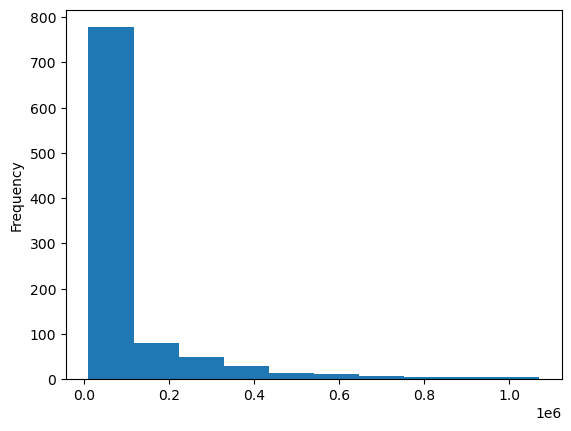

In [80]:
df.hammer_price.plot(kind='hist')

In [81]:
model_df, df_scaled = m.model_df(df)

MinMaxScaler() Scaler with params of:
----
{'clip': False, 'copy': True, 'feature_range': (0, 1)}


<Axes: ylabel='Frequency'>

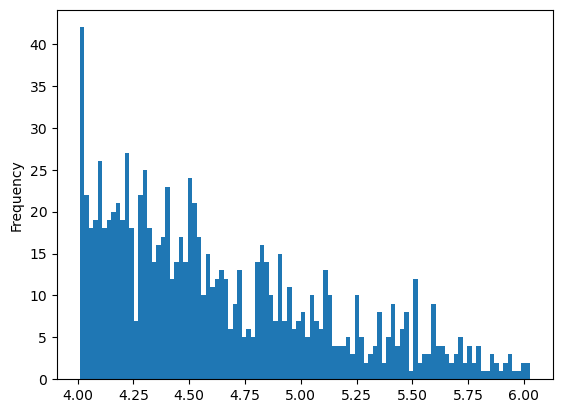

In [82]:
df.log_hammer_price.plot(kind='hist',bins=100)

<Axes: ylabel='Frequency'>

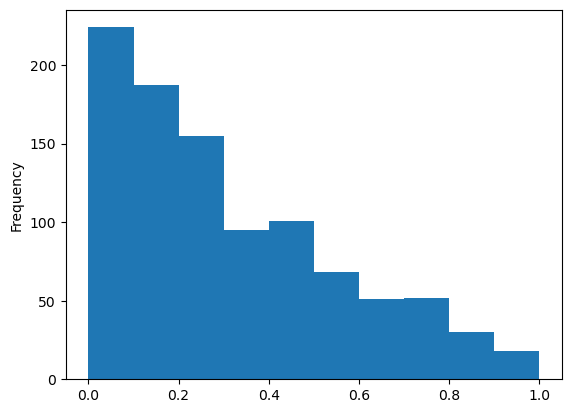

In [83]:
df_scaled.log_hammer_price.plot(kind='hist')

In [84]:
df_scaled.head()

,year_created,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,is_paper,is_print,is_sculpture,is_canvas,is_other_format,...,banksy,kaws,leonard tsuguharu foujita,marc chagall,pablo picasso,rembrandt van rijn,salvador dali,yayoi kusama,zhang daqian,log_hammer_price
0,0.222801,0.017928,0.017992,0.024908,0.018410,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274661
1,0.222358,0.017928,0.017992,0.020131,0.018410,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242663
2,0.222690,0.109957,0.091611,0.118704,0.017107,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556764
3,0.222136,0.014247,0.011857,0.013715,0.018410,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190461
4,0.222136,0.012218,0.010468,0.010500,0.018410,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158596


In [85]:
model_df.head()

,year_created,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,is_paper,is_print,is_sculpture,is_canvas,is_other_format,...,banksy,kaws,leonard tsuguharu foujita,marc chagall,pablo picasso,rembrandt van rijn,salvador dali,yayoi kusama,zhang daqian,log_hammer_price
0,2009.0,24749.0,37124.0,36622.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.563742
1,2005.0,24749.0,37124.0,31555.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.499068
2,2008.0,148496.0,185620.0,136121.0,-8.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,5.133925
3,2003.0,19799.0,24749.0,24749.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.393558
4,2003.0,17071.0,21948.0,21338.0,0.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,4.329154


## Calculating average estimations

In [86]:
mean_estimate = df.percent_estimate.sum() / len(df.percent_estimate)
mean_estimate

51.17940876656473

## Baselines

In [ ]:
df.hammer_price.mean()

In [ ]:
df.hammer_price.median()

In [90]:
metrics_df = m.metrics_dataframe(model='hammer_price mean', RMSE=df.hammer_price.mean(),r2='None')
m.save_metrics(model='hammer_price median',RMSE=df.hammer_price.median(),df=metrics_df, r2='None')

,model,rmse,r^2
0,hammer_price mean,95225.865443,None
1,hammer_price median,32366.000000,None


In [91]:
train, validate, test = w.splitter(df_scaled)

Dataframe: (981, 34) 100%
Train: (588, 34) | ~60%
Validate: (196, 34) | ~20%
Test: (197, 34) | ~20%


In [92]:
x_train = train.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])
x_validate = validate.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])
x_test = test.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])

y_train = train[['log_hammer_price']]
y_validate = validate[['log_hammer_price']]
y_test = test[['log_hammer_price']]

In [94]:
x_train = train.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])
x_validate = validate.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])
x_test = test.drop(columns=['log_hammer_price','hammer_price','estimate_usd_low','estimate_usd_high','percent_estimate'])

y_train = train[['hammer_price']]
y_validate = validate[['hammer_price']]
y_test = test[['hammer_price']]

# Recursive Feature Engineering

In [96]:
# seeing most important features
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=10)
X_rfe = rfe.fit(x_train, y_train)
rfe_columns = x_train.columns[rfe.support_].tolist()
rfe_columns

['year_created',
 'is_print',
 'is_canvas',
 'height_in',
 'width_in',
 'kaws',
 'leonard tsuguharu foujita',
 'pablo picasso',
 'rembrandt van rijn',
 'salvador dali']

In [97]:
# calculating baselines
log_price_mean = df.log_hammer_price.mean()
log_price_std = df.log_hammer_price.std()
price_mean = df.hammer_price.mean()
price_std = df.hammer_price.std()

In [98]:
# validate for OLS
ols_validate_model_predictions, metrics_df = m.linear_regression_compiled(x_train, y_train, x_validate, y_validate, target_mean=price_mean
,target_std=price_std,test=False, metrics_df=metrics_df)

Best fit parameters (Determined by GridSearchCV): {'fit_intercept': True, 'n_jobs': -1}
Training MSE: 298985316.297949, Training RMSE: 17291.191870369985, Training R^2: 0.4566871242844235
Test MSE: 461780669.434201, Test RMSE: 21489.082563809025, Test R^2: 0.3007373224740141


In [99]:
# test for OLS
ols_test_model_predictions, metrics_df = m.linear_regression_compiled(x_train, y_train, x_test, y_test,
                             target_mean=price_mean
                            ,target_std=price_std,metrics_df=metrics_df)

Best fit parameters (Determined by GridSearchCV): {'fit_intercept': True, 'n_jobs': -1}
Training MSE: 298985316.297949, Training RMSE: 17291.191870369985, Training R^2: 0.4566871242844235
Test MSE: 295749101.1764153, Test RMSE: 17197.357389332097, Test R^2: 0.03657707652095332


In [100]:
# validate for Lars
lars_validate_model_predictions, metrics_df = m.lasso_lars_compiled(x_train, y_train, x_validate, y_validate, target_mean=price_mean
,target_std=price_std,test=False,metrics_df=metrics_df)

Best fit parameters (Determined by GridSearchCV): {'alpha': 0.001, 'fit_intercept': False}
Training MSE: 310483333.313002, Training RMSE: 17620.53725948792, Training R^2: 0.43579305240548993
Test MSE: 469725973.1868795, Test RMSE: 21673.16251004637, Test R^2: 0.2887059518610722


In [101]:
# test for Lars
lars_test_model_predictions, metrics_df = m.lasso_lars_compiled(x_train, y_train, x_test, y_test,
                             target_mean=price_mean
                            ,target_std=price_std,metrics_df=metrics_df)

Best fit parameters (Determined by GridSearchCV): {'alpha': 0.001, 'fit_intercept': False}
Training MSE: 310483333.313002, Training RMSE: 17620.53725948792, Training R^2: 0.43579305240548993
Test MSE: 265827169.84292373, Test RMSE: 16304.20712095267, Test R^2: 0.13404981421240636


In [102]:
# validate for TR
tweedie_validate_model_predictions, metrics_df = m.tweedie_regressor_compiled(x_train, y_train, x_validate, y_validate, target_mean=price_mean
,target_std=price_std,test=False, metrics_df=metrics_df)

Best fit parameters (Determined by GridSearchCV): {'alpha': 0.1, 'power': 0}
Training MSE: 347959945.40760136, Training RMSE: 18653.68449951916, Training R^2: 0.3676909591612084
Test MSE: 490317791.44440466, Test RMSE: 22143.120634734496, Test R^2: 0.2575242872246376


In [103]:
# test for TR
tweedie_test_model_predictions, metrics_df = m.tweedie_regressor_compiled(x_train, y_train, x_test, y_test,
                             target_mean=price_mean
                            ,target_std=price_std,metrics_df=metrics_df)

Best fit parameters (Determined by GridSearchCV): {'alpha': 0.1, 'power': 0}
Training MSE: 347959945.40760136, Training RMSE: 18653.68449951916, Training R^2: 0.3676909591612084
Test MSE: 260513214.9455475, Test RMSE: 16140.421770993084, Test R^2: 0.1513603857140664


In [104]:
metrics_df.sort_values(by='rmse')

,model,rmse,r^2
7,test-Tweedie,16140.421771,0.15136
5,test-Lasso_Lars,16304.207121,0.13405
3,test-OLS,17197.357389,0.036577
2,val-OLS,21489.082564,0.300737
4,val-Lasso_Lars,21673.162510,0.288706
6,val-Tweedie,22143.120635,0.257524
1,hammer_price median,32366.000000,None
0,hammer_price mean,95225.865443,None


In [124]:
95225/16140

5.8999380421313505

<Axes: xlabel='model'>

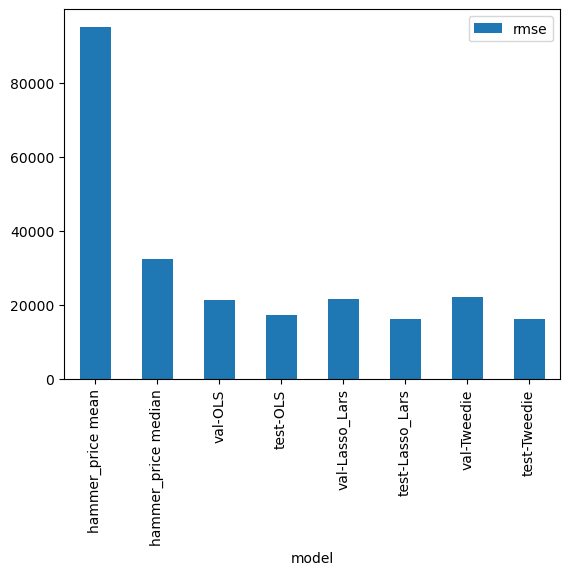

In [105]:
# visual to compare metrics
metrics_df.plot(kind='bar',x='model')

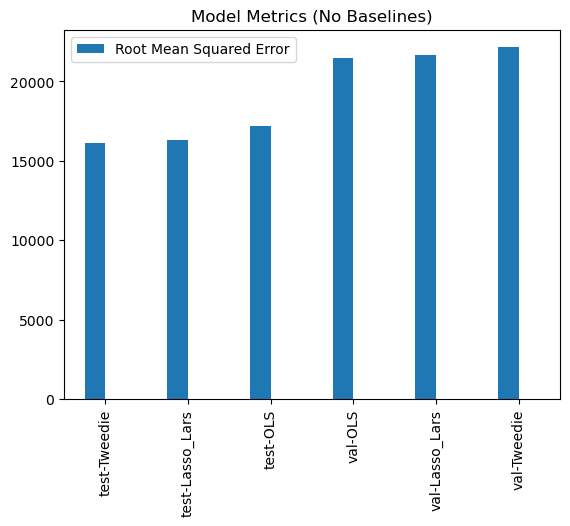

In [122]:
filtered_metrics = metrics_df[~metrics_df['model'].isin(['hammer_price mean', 'hammer_price median'])]
ax1 = filtered_metrics.sort_values('rmse').plot(kind='bar', x='model',legend=False, xlabel='')
ax1.legend(['Root Mean Squared Error'])
ax1.set_title('Model Metrics (No Baselines)')
plt.show()

# Deep Learning Component

In [ ]:
df_scaled.head(2)

,year_created,estimate_usd_low,estimate_usd_high,hammer_price,percent_estimate,is_paper,is_print,is_sculpture,is_canvas,is_other_format,...,banksy,kaws,leonard tsuguharu foujita,marc chagall,pablo picasso,rembrandt van rijn,salvador dali,yayoi kusama,zhang daqian,log_hammer_price
0,0.222801,0.017928,0.017992,0.024908,0.01841,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.274661
1,0.222358,0.017928,0.017992,0.020131,0.01841,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242663


In [ ]:
import cv2
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, concatenate

In [138]:
def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(89,89))

    # Convert to array
    img = img_to_array(img)
    # Normalize
    img = img / 255.0
    return img

In [140]:
df_scaled['image'] = None

In [131]:
os.listdir('./images')[1:9]

['picasso',
 'leonardtsuguharufoujita',
 'zhangdaqian',
 'yayoi-kusama',
 'marcchagall',
 'kaws',
 'rembrandt',
 'warhol']

In [139]:
for artist_folder in os.listdir('./images')[1:9]:
    for image_file in os.listdir(os.path.join('./images/', artist_folder)):
        file_path = os.path.join('./images/', artist_folder, image_file)
        df_scaled.loc[df['artist'] == artist_folder, 'image'] = load_and_preprocess_image(file_path)

ValueError: shape mismatch: value array of shape (89,89,3) could not be broadcast to indexing result of shape (0,89,3)

In [ ]:
# Assuming image_data is your image data and numerical_data is your numerical data

# Create the image input layer
image_input = Input(shape=image_data.shape[1:])
conv = vgg16(32, kernel_size=4, activation='relu')(image_input)
pool = MaxPooling2D(pool_size=(2, 2))(conv)
flat = Flatten()(pool)

# Create the numerical input layer
numerical_input = Input(shape=(numerical_data.shape[1],))
dense = Dense(32, activation='relu')(numerical_input)

# Concatenate the output of the two branches
concat = concatenate([flat, dense])

# Add a dense layer and the output layer
output = Dense(1)(concat)

# Create the model
model = Model(inputs=[image_input, numerical_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
test_loss, test_mse, test_mae = model.evaluate([X_test_image, X_test_numerical], y_test)